<a href="https://colab.research.google.com/github/takenfromsellan/datascience/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 1. **ABSTRACT**

 La ONU en conjunto con el Banco Mundial nos contrato para definír como será la distribucion del primer envio de vacunas a nivel mundial, con el fin de brindar ayuda a los continentes mas afectados por la Pandemia.
Es por esto que se realizan diferentes graficos con el fin de poder analizar la situacion epidemiologica de distintas regiones/continentes del mundo.






  


















 La principal hipotesis a resolver es;



  *¿Cómo podemos identificar cuál es el continente más afectado por covid 19?*


  En este trabajo se analiza la informacion proveniente del siguiente dataset

  https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv


  Este nos brindara informacion relevante de cada nacion, contiene al menos 1 o muchos registros por nación, informando la situación epidemiológica. Dentro del mismo tenemos datos importantes para poder realizar nuestro analisis, a continuacion detallaremos cuales son las variables de interes que usaremos










**Columnas de Interés**


1.continent    (continente)

2.location     (Pais)

3.date         (Fecha)

4.total_cases  (Casos totales)

5.new_cases    (Nuevos Casos)

6.people_vaccinated   (Persona Vacunadas)

7.total_deaths      (Cantidad de Muertes)

8.new_deaths        (Nuevas Muertes)

9.median_age       (Edad Media)







Con estos datos mencionados se realizaran visualizaciones orientadas con el fin de poder entender mejor la situacion de cada region, para luego poder determinar los porcentajes que le correspondora a cada region/continente de la primera asignacion de vacunas  por parte del Banco mundial


Ademas se implementó un modelo de regresion el cual fue validado y se basa en un Arbol de decision para realizar predicciones. La variable Objetivo para realizar predicciones sera sobre la cantidad de nuevos casos confirmados.
 Nuestro modelo nos arroja un 26,8% valores erroneos, el modelo es demasiado sensible al azar de los datos tomados, por lo tanto no resulta adecuado para hacer predicciones. Por lo que se lo podria definir como Underfitting o Sub-Ajuste.

El **Objetivo** de este trabajo es poder determinar cual es la region mas afectada, para eso se realizan graficos con las variables anteriormente mencionadas con el fin de poder determinarlo.

Queremos responder las preguntas comerciales que se detallaran a continuacion;


3. **PROBLEMA COMERCIAL**


  ¿Cómo podemos identificar cuál es el continente más afectado por covid 19?

  ¿Qué continente tiene más casos?

¿Cuál tiene la mayor tasa de positividad?

¿Qué continente tiene más población vacunada?

¿Cuál es la media de edad general para toda la población?





2. **CONTEXTO COMERCIAL**


 El mundo se encuentra atravesando el brote de Covid 19, una pandemia que golpea a las naciones de tal manera que deben cerrar actividades comerciales con el fin de poder controlar la cantidad de contagios. Es por esto que muchos paises estan viendo como sus PBI se reducen notablemente y se ha ido aumentando el empobrecimiento y endeudamiento de los mismos
   











3. **CONTEXTO ANALITICO**

Dado el avance del Virus en el mundo se requieren tomar decisiones sobre cual es la mejor manera de distribuir las vacunas en este dificil momento. Es por esto que se realizaran graficos con el fin de poder evaluar las situaciones epidemiologicas de cada continente utilizando las variables de interes mencionadas anteriormente

**DATA ADQUISITION**


In [ ]:



import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold



url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv (url)

df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241738,ZWE,Africa,Zimbabwe,2022-12-06,259356.0,192.0,209.0,5622.0,2.0,2.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
241739,ZWE,Africa,Zimbabwe,2022-12-07,259356.0,NaN,NaN,5622.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
241740,ZWE,Africa,Zimbabwe,2022-12-08,259356.0,NaN,NaN,5622.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
241741,ZWE,Africa,Zimbabwe,2022-12-09,259356.0,NaN,NaN,5622.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


4. **EXPLORATORY DATA ANALYSIS (EDA)**


In [ ]:
#Filtramos el dataset por fecha para poder acceder a la informacion acumulada, ya que cada registro de nuestro dataset tienen los valores acumulados y no nuevos registros a sumar al total. Es por esto que al elegir la ultima fecha
#disponible estaremos haciendo referencia a los valores acumulados mas actuales.

df_real = df.loc[df.date=="2022-07-21"]
df_real.reset_index(drop=True, inplace=True)
#df_maximo =df_real.groupby(df['continent'])['total_cases'].mean()

df_real

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2022-07-21,184224.0,186.0,123.714,7738.0,1.0,1.429,...,NaN,37.746,0.500,64.83,0.511,4.112877e+07,NaN,NaN,NaN,NaN
1,OWID_AFR,NaN,Africa,2022-07-21,12214693.0,3136.0,7655.143,255784.0,16.0,42.857,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2022-07-21,301394.0,1336.0,1491.429,3521.0,0.0,0.571,...,51.200,NaN,2.890,78.57,0.795,2.842318e+06,NaN,NaN,NaN,NaN
3,DZA,Africa,Algeria,2022-07-21,266654.0,63.0,42.571,6875.0,0.0,0.000,...,30.400,83.741,1.900,76.88,0.748,4.490323e+07,NaN,NaN,NaN,NaN
4,AND,Europe,Andorra,2022-07-21,45326.0,265.0,93.571,153.0,0.0,0.000,...,37.800,NaN,NaN,83.73,0.868,7.984300e+04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,WLF,Oceania,Wallis and Futuna,2022-07-21,533.0,0.0,11.000,7.0,0.0,0.000,...,NaN,NaN,NaN,79.94,NaN,1.159600e+04,NaN,NaN,NaN,NaN
239,OWID_WRL,NaN,World,2022-07-21,568169905.0,1124960.0,1073152.857,6400299.0,2462.0,2138.429,...,34.635,60.130,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
240,YEM,Asia,Yemen,2022-07-21,11849.0,0.0,2.429,2149.0,0.0,0.000,...,29.200,49.542,0.700,66.12,0.470,3.369661e+07,NaN,NaN,NaN,NaN
241,ZMB,Africa,Zambia,2022-07-21,328550.0,0.0,206.857,4013.0,0.0,0.714,...,24.700,13.938,2.000,63.89,0.584,2.001767e+07,NaN,NaN,NaN,NaN


In [ ]:
indice = list(df.columns)
print (indice)

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

**DATA WRANGLING**


Eliminamos datos nulos y los reemplazamos por valor 0



In [ ]:
df[df['hosp_patients'].isnull()]
df.fillna(0,inplace=True)
df
df.isnull().sum(axis=0)

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
population                                 0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 67, dtype: int64

Excluimos el continente 0, el cual contiene una sumatoria de todos los continentes, lo que nos generaba un problema a la hora de visualizar los datos, ya que era un dato numericamente muy distante del resto, por lo cual decidimos exlcuirlo para tener una visualizacion mas clara.

Ademas obtenemos los totales de cada continente utilizando em campo ISO_CODE como referencia para agrupar por continente. Esto nos va a permitir realizar visualizaciones de menera mas sencilla y sin tener que contabilizar todos los registros.

In [ ]:


df_real.fillna(0,inplace=True)
df_owid = df_real.loc[df_real.continent==0]
df_owid.reset_index(drop=True, inplace=True)
df_owid



/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,OWID_AFR,0,Africa,2022-07-21,12214693.0,3136.0,7655.143,255784.0,16.0,42.857,...,0.000,0.00,0.000,0.00,0.000,1.426737e+09,0.0,0.0,0.0,0.0
1,OWID_ASI,0,Asia,2022-07-21,161591033.0,376657.0,309352.286,1449618.0,346.0,273.714,...,0.000,0.00,0.000,0.00,0.000,4.721383e+09,0.0,0.0,0.0,0.0
2,OWID_EUR,0,Europe,2022-07-21,215068025.0,345248.0,433536.286,1895583.0,715.0,792.857,...,0.000,0.00,0.000,0.00,0.000,7.448078e+08,0.0,0.0,0.0,0.0
3,OWID_EUN,0,European Union,2022-07-21,157479588.0,329103.0,393069.429,1113563.0,534.0,575.429,...,0.000,0.00,0.000,0.00,0.000,4.501468e+08,0.0,0.0,0.0,0.0
4,OWID_HIC,0,High income,2022-07-21,342672969.0,890397.0,838885.286,2570412.0,1517.0,1471.571,...,0.000,0.00,0.000,0.00,0.000,1.250515e+09,0.0,0.0,0.0,0.0
5,OWID_INT,0,International,2022-07-21,721.0,0.0,0.000,15.0,0.0,0.000,...,0.000,0.00,0.000,0.00,0.000,0.000000e+00,0.0,0.0,0.0,0.0
6,OWID_LIC,0,Low income,2022-07-21,2203484.0,838.0,852.143,47395.0,3.0,7.143,...,0.000,0.00,0.000,0.00,0.000,7.376049e+08,0.0,0.0,0.0,0.0
7,OWID_LMC,0,Lower middle income,2022-07-21,93231703.0,53907.0,50984.857,1322845.0,138.0,129.286,...,0.000,0.00,0.000,0.00,0.000,3.432097e+09,0.0,0.0,0.0,0.0
8,OWID_NAM,0,North America,2022-07-21,106930814.0,226979.0,174179.857,1472042.0,711.0,582.000,...,0.000,0.00,0.000,0.00,0.000,6.003237e+08,0.0,0.0,0.0,0.0
9,OWID_OCE,0,Oceania,2022-07-21,10903576.0,61360.0,56410.857,15169.0,60.0,79.571,...,0.000,0.00,0.000,0.00,0.000,4.503886e+07,0.0,0.0,0.0,0.0


In [ ]:
df_idx=df_real[df_real["continent"]==0].index
young_folks=df_real.drop(df_idx)

In [ ]:


import plotly.express as px
fig=px.bar(young_folks, y='life_expectancy', x='location', color='continent')

fig.update_layout(uniformtext_minsize=0)
fig.update_layout(xaxis_tickangle= 100)

fig

¿Que continente tiene la mayor cantidad de casos reportados?

Text(0, 0.5, 'Casos Totales')

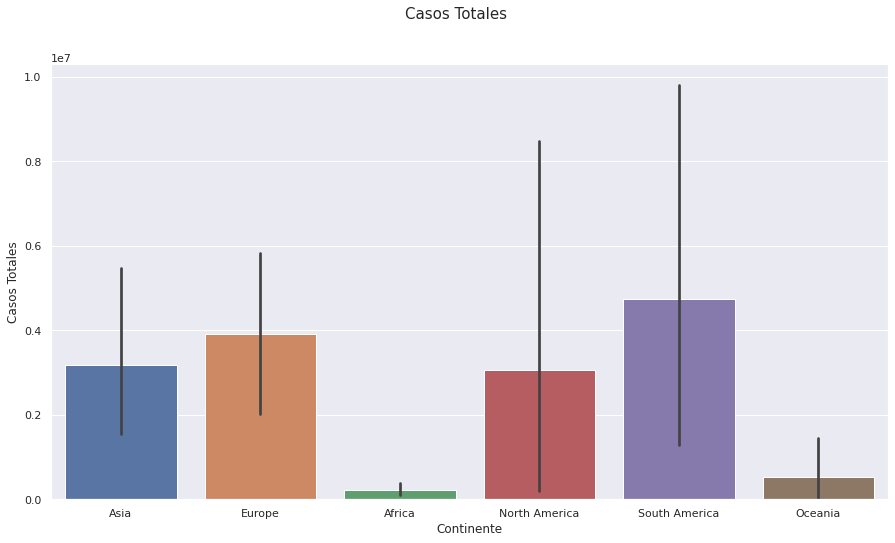

In [ ]:
df_idx=df_real[df_real["continent"]==0].index
young_folks=df_real.drop(df_idx)

sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='continent', y='total_cases', data=young_folks)
plt.suptitle('Casos Totales', fontsize=15)
plt.xlabel("Continente", size= 12)
plt.ylabel("Casos Totales", size = 12)

¿Que continente tiene la mayor cantidad de nuevos casos reportados?

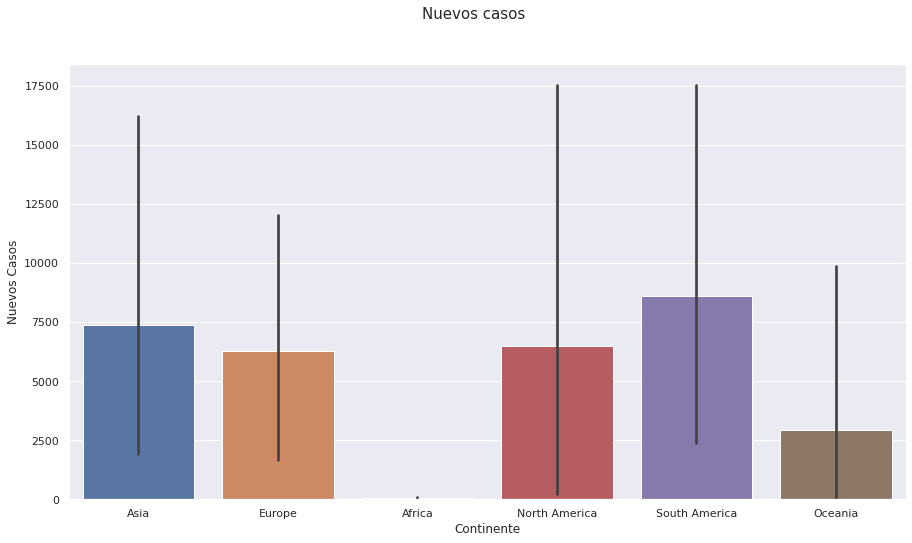

In [ ]:

sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='continent', y='new_cases', data=young_folks)
plt.suptitle('Nuevos casos', fontsize=15)
plt.xlabel("Continente", size= 12)
plt.ylabel("Nuevos Casos", size = 12)
plt.show()

¿Que continente tiene la mayor cantidad de muertes reportadas?

Text(0, 0.5, 'Casos Totales')

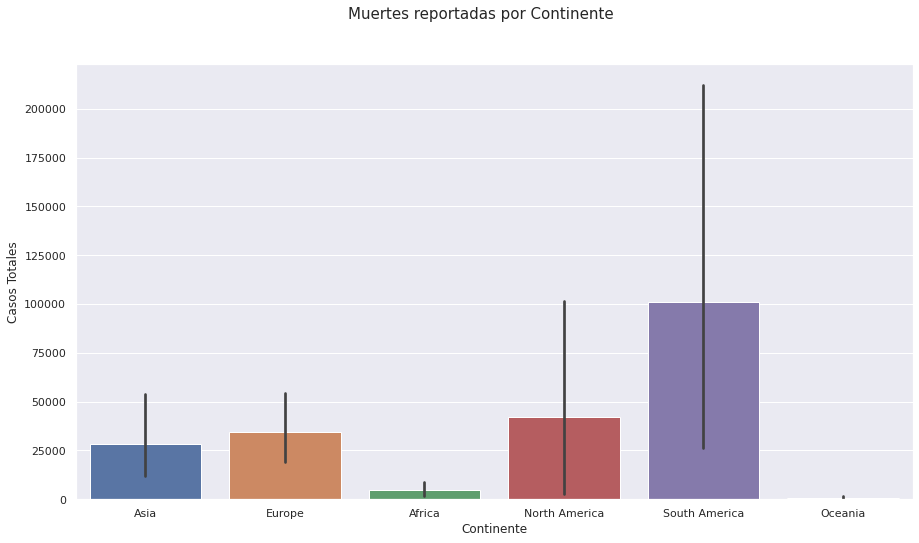

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='continent', y='total_deaths', data=young_folks)
plt.suptitle('Muertes reportadas por Continente', fontsize=15)
plt.xlabel("Continente", size= 12)
plt.ylabel("Casos Totales", size = 12)

¿En que region se han realizado la mayor cantidad de testeos?

Text(0, 0.5, 'Casos Totales')

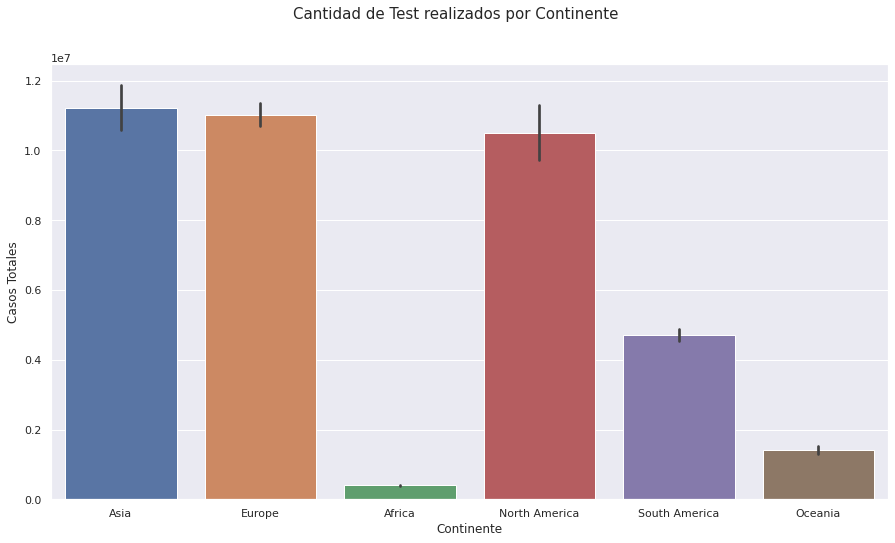

In [ ]:
df_1=df[df["continent"]==0].index
folks=df.drop(df_1)

sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='continent', y='total_tests', data=folks)
plt.suptitle('Cantidad de Test realizados por Continente', fontsize=15)
plt.xlabel("Continente", size= 12)
plt.ylabel("Casos Totales", size = 12)

 ¿Que continente tiene mayor tasa de positividad?


Text(0, 0.5, 'Tasa de Positividad')

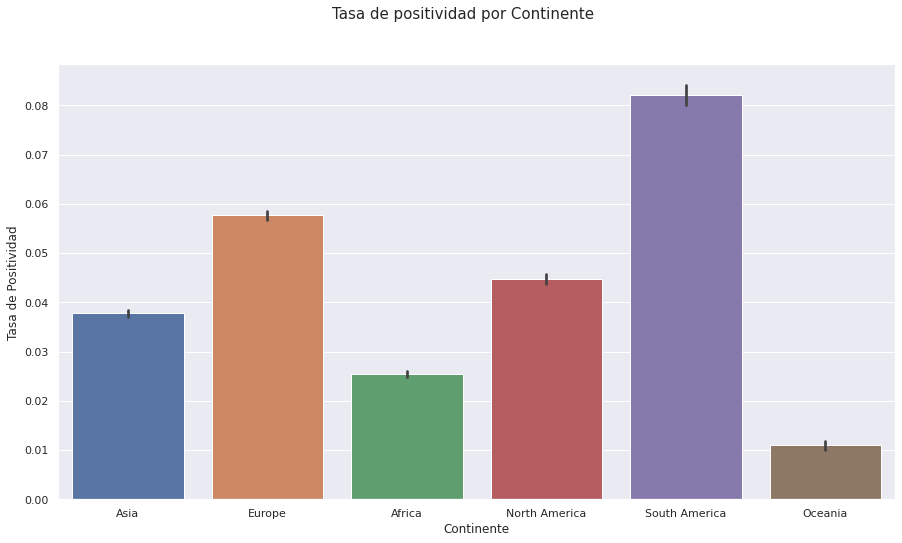

In [ ]:

sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x="continent", y='positive_rate', data=folks)
plt.suptitle('Tasa de positividad por Continente', fontsize=15)
plt.xlabel("Continente", size= 12)
plt.ylabel("Tasa de Positividad", size = 12)

¿Que continente avanzo mas rapido con la vacunacion?

Nos permite tener una idea de con que velocidad se ha ido vacunando a la poblacion por continente. Y asi definir las zonas donde la campaña de vacunacion viene mas lenta, sin embargo capaz los lugares donde falte mas gente vacunar no sean los mas afectados por COVID En este caso el grafico nos informa que Asia es el pais con mas poblacion vacunada en el mundo. En contra partida vemos que America del sur ademas de tener la tasa de positividad mas alta, tambien la poblacion vacunada es baja, lo cual
 podria ser uno de los condicionantes para definirlo como una de las zonas mas afectadas


In [ ]:

fig = px.bar(young_folks, x='continent', y="people_vaccinated", color="continent")
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)
fig.show()
#plt.xlim(0,6)
#plt.ylim(100000,6000000)

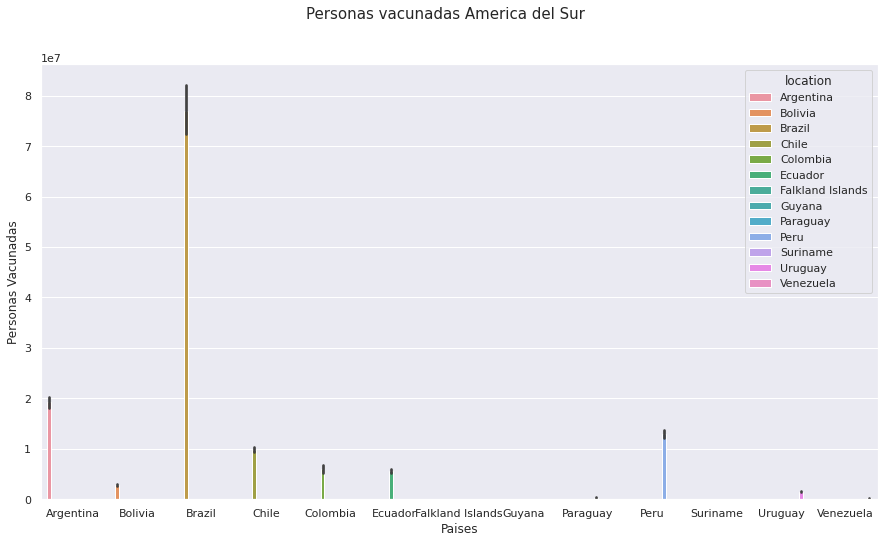

In [ ]:

df_sudame = df[df["continent"] == "South America"]

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data=df_sudame, x="location",
             hue="location",
             y='people_vaccinated'
             )
plt.suptitle('Personas vacunadas America del Sur', fontsize=15)
plt.xlabel("Paises", size= 12)
plt.ylabel("Personas Vacunadas", size = 12)
plt.show()

Como podemos ver en este grafico Brasil tiene el mayor indice de poblacion vacunada, sin embargo paises como Guayana, Suriname y paraguay vienen en contrapartida con un nivel de vacunacion mas bajo.
Sin embargo habria que evaluar esta informacion teniendo la cantidad de poblacion de cada nacion, para realmente poder estimar el porcentaje de poblacion que esta vacunada o no (este dato no se encuentra en nuestro dataset)



 Aca vemos los datos especificos de un solo pais, en este caso elegimos Argentina. Y podemos utilizar el campo fecha para ver la evolucion de muertes en ese pais por una unidad de tiempo. A partir de esto podemos notar como viene su "curva"

Argentina tiene una cantidad de muertes mucho mas alta Zimbawe (Africa) y Incluso que Bolivia que esta en el mismo Continente

In [ ]:

import plotly.express as px
df_new = df[df["location"] == "Argentina"]

fig=px.line(data_frame=df_new,x="date",y='total_cases',title='Casos Totales en Argentina')
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)
fig.show()

In [ ]:
fig=px.line(data_frame=df_new,x="date",y='total_deaths',title='Cantidad de Muertes en Argentina')
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)
fig.show()


In [ ]:
#Mismo Grafico y mismo periodo de tiempo pero en este caso sobre Zimbabwe, lo que nos permite a simple vista comparar ambos graficos (el de Argentina y este) y asi determinar que pais esta siendo mayormente afectado por el covid... en este caso vemos que Argentina tiene una mayor tasa de defuncion

df_Zimbabwe = df[df["location"] == "Zimbabwe"]

fig=px.line(data_frame=df_Zimbabwe,x="date",y='total_deaths',title='Cantidad de Muertes en Zimbabwe')
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)

fig.show()


In [ ]:


df_paraguay = df[df["location"] == "Paraguay"]

fig=px.line(data_frame=df_paraguay,x="date",y='total_deaths',title='Cantidad de Muertes en Paraguay')
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)



fig.show()

In [ ]:
df_pr = df[df["location"] == "Peru"]

fig=px.line(data_frame=df_pr,x="date",y='total_deaths',title='Cantidad de Muertes en Peru')
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)

fig.show()


In [ ]:
df_br = df[df["location"] == "Brazil"]

fig=px.line(data_frame=df_br,x="date",y='total_deaths',title='Cantidad de Muertes en Brasil')
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)

fig.show()


**Interpretación de resultados y conclusiones**

- Como podemos deducir en base a nuestros insights la mayor cantidad de casos reportados se encuentra en la region de America del Sur

- Ademas en America del sur tenemos el numero mas alto de decesos reportados por covid.


- Hay relativamente menos muertes confirmadas en los demas continentes


- Podemos ver que Argentina y Peru tienen un número muy alto de decesos

- Tambien podriamos afirmar que Asia viene vacunando a su poblacion de una manera mas rapida que el resto

- Podemos ver como Brasil (ubicado en el contienente mas afectado) tiene un ritmo de vacunacion mucho mas alto que los demas paises de la region.
 Pero en contra partida nos falta informacion de este pais sobre la cantidad de muertes confirmadas.

 - Otra valoracion interesante para hacer sobre los insights obtenidos es que la region que mas testeos hizo fue America del Norte, pero America del Sur tiene un numero inferior considerablemente lo que nos hace pensar que si la tasa de positividad es mayor claro esta que si tuvieramos un mayor numero de testeos la cantidad de casos totales aumentaria notablamente y tambien asi las muertes reportadas.


**CONCLUSION**

Analizando los graficos y la informacion obtenida de los Insight podemos ver como America del Sur tiene la tasa mas alta de positividad y sumado a esto, evaluamos casos puntuales paises de esta region donde la cantidad de muertes confirmadas es muy elevada en comparado con otras regiones.

Es por esto que se determina asignar un mayor porcentaje de vacunas a las zonas mas afectadas


Asignaciones:

America del Sur = 22%

Americal del Norte = 16%

Oceania = 12%

Asia = 15%

Europa = %16

Africa = %19



**ELABORACION DE MODELO**


Algoritmo de Regresion.

Arbol de decision

Feature Engineearing

In [ ]:
#VALIDATION MODEL


##covid_file_path = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

##df_real = pd.read_csv(covid_file_path)
y = df["new_cases"]
feature_columns = ['total_deaths', 'total_cases', 'new_deaths',"people_vaccinated",'total_tests']
X = df[feature_columns]

X.fillna(0,inplace=True)
X


#Specify Model
covid_model = DecisionTreeRegressor()
#Fit Model
covid_model.fit(X,y)


print("First in-sample prediction:", covid_model.predict(X.head()))
print("Actual target values for those homes:", y.head().tolist())


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



First in-sample prediction: [0.68867925 0.68867925 0.68867925 0.68867925 0.68867925]
Actual target values for those homes: [5.0, 0.0, 0.0, 0.0, 0.0]


*ENTRENAMIENTO DE NUESTRO MODELO*

In [ ]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y= train_test_split(X,y,test_size= 0.2)


In [ ]:
# Specify the model

covid_model = DecisionTreeRegressor(random_state=1)

# Fit iowa_model with the training data.
covid_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [ ]:
# Predict with all validation observations
test_predictions = covid_model.predict(test_X)

In [ ]:
# print the top few validation predictions
print(test_predictions[:5])
# print the top few actual prices from validation data
print(test_y.values[0:5])

[0.00000e+00 1.52979e+05 4.00000e+00 0.00000e+00 1.80000e+01]
[0.00000e+00 1.31803e+05 0.00000e+00 0.00000e+00 2.50000e+01]


In [ ]:
from sklearn.metrics import mean_absolute_error

test_mae = mean_absolute_error(test_y, test_predictions)

print(test_mae)

2405.3290082028193


In [ ]:
test_mae/y.mean() * 100

21.005781923234522

 **Error absoluto medio (MAE)**

Esta vez nuestro error absoluto fue mas bajo, 19,3. Por lo que notamos una mejora en el modelo, anteriormente cuando eran menos variables nuestro pronostico habia estado errado en un 26,8%. Lo que afirma que fue ajustado.

La variable Objetivo para realizar predicciones sera sobre la cantidad de nuevos casos confirmados.

* Se agregaron mas columnas para realizar la prediccion








In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(X, y)

5

In [ ]:
train, test = list(skf.split(X, y))[0]

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



In [ ]:
import xgboost as xgb
model= xgb.XGBClassifier(learning_rate=0.001)
# Lista de hiperparametros
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10}

In [ ]:
# Modelo 1
model.set_params(**params_1).fit(train_X, train_y)
print(f'Accuracy para Modelo 1 = {round(accuracy_score(test_y, model.predict(test_X)), 5)}')
# Modelo 2
model.set_params(**params_2).fit(train_X, train_y)
print(f'Accuracy para Modelo 2 = {round(accuracy_score(test_y, model.predict(test_X)), 5)}')
# Modelo 3
model.set_params(**params_3).fit(train_X, train_y)
print(f'Accuracy para Modelo 3 = {round(accuracy_score(test_y, model.predict(test_X)), 5)}')

In [ ]:
from sklearn.model_selection import GridSearchCV
# tiempo de ejecucuon 424 seg
grid_cv = GridSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(train_X, train_y)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(test_y, grid_cv.predict(test_X)), 5)}')